# 1. 导入工具包

In [26]:
import numpy as np
import random as rd
import time


# 2. 数据集导入和随机选择

In [165]:
from sklearn.linear_model.logistic import LogisticRegression
#导入两类数据组
Training_Data=np.loadtxt('D:\杭电与人工智能研究院\光伏教仪\人工智能课程案例\课程实验课件\机器学习课程实验二___逻辑回归\数据\Training_Data.txt')
#print(TrainingData.shape)

# Training_Data 800*3  400组正常运行数据  400组阴影遮挡数据 
#训练数据与测试数据比例4：1
m,n=Training_Data.shape

#在各组中随机地抽取Num_train个训练样本
Num_train=int(m//2*0.8)

temp_w1=np.random.permutation(m//2)
temp_w2=400+np.random.permutation(m//2)


#训练集
X_train=Training_Data[temp_w1[0:Num_train],0:2]
X_train=np.vstack((X_train,Training_Data[temp_w2[0:Num_train],0:2]))     

Y_train=Training_Data[temp_w1[0:Num_train],2]
Y_train=np.hstack((Y_train,Training_Data[temp_w2[0:Num_train],2]))  

X_test=Training_Data[temp_w1[Num_train:m],0:2]
X_test=np.vstack((X_test,Training_Data[temp_w2[Num_train:m],0:2])) 

Y_test=Training_Data[temp_w1[Num_train:m],2]
Y_test=np.hstack((Y_test,Training_Data[temp_w2[Num_train:m],2]))

#转化为numpy.array
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)


# 3.逻辑回归训练

In [166]:

#LogisticRegression实现了fit()和predict()方法
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
predictions=classifier.predict(X_test)

#误差
error=predictions-Y_test
#误差率
acc=0
for i in range(len(error)):
    acc=acc+abs(error[i])

Misclassification_Rate=acc/len(error)
print('160组数据的测试误差 ：%2.2f %%' %(Misclassification_Rate*100))

correct_w1=[0,0]
correct_w2=[0,0]
error_w1=[0,0]
error_w2=[0,0]
for i in range(0,160):
   
    #类w1测试样本归为类w1
    if (i<80 and predictions[i]==0):
        correct_w1=np.vstack((correct_w1,X_test[i,:]))
    #类w2测试样本归为类w2
    elif i>=80 and predictions[i]==1:
        correct_w2=np.vstack((correct_w2,X_test[i,:]))
    #类w1测试样本误判为类w2
    elif (i<80 and predictions[i]==1):
        error_w1=np.vstack((error_w1,X_test[i,:]))
    #类w2测试样本误判为类w1
    elif (i>=80 and predictions[i]==0):
        error_w2=np.vstack((error_w2,X_test[i,:]))

160组数据的测试误差 ：25.62 %


# 4. 数据可视化

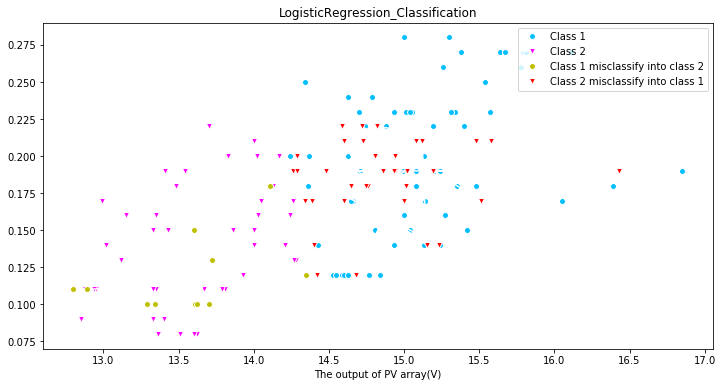

In [162]:
# 画图 两分类结果
import matplotlib.pyplot as plt  #Python导入Matplotlib包，专门用于绘图
#显示中文和负号

#plt.rcParams['font.sas-serig']=['SimHei'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure(figsize=(12, 6))  # 窗口大小

c1, =plt.plot(correct_w1[1:len(correct_w1),0], correct_w1[1:len(correct_w1),1],'w',markerfacecolor='#00BFFF',\
              marker='o')
c2, =plt.plot(correct_w2[1:len(correct_w2),0], correct_w2[1:len(correct_w2),1],'w',markerfacecolor='#FF00FF', \
              marker='v')
c3, =plt.plot(error_w1[1:len(error_w1),0], error_w1[1:len(error_w1),1],'w',markerfacecolor='y', marker='o')
c4, =plt.plot(error_w2[1:len(error_w2),0], error_w2[1:len(error_w2),1],'w',markerfacecolor='r', marker='v')

plt.xlabel('The output of PV array(V)')
plt.xlabel('The output of PV array(V)')

plt.title('LogisticRegression_Classification')
plt.legend([c1, c2, c3, c4], ["Class 1", "Class 2",  "Class 1 misclassify into class 2"\
                              ,  "Class 2 misclassify into class 1"], loc=1)

# 显示图形
plt.show()